In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("Credit.csv")

In [4]:
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [7]:
# Convert the 'Class' column to binary (1 for 'Bad', 0 for 'Good')
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'Bad' else 0)

# Verify the conversion
df['Class'].value_counts()


0    700
1    300
Name: Class, dtype: int64

In [8]:
X=df.drop("Class",axis=1)
Y=df["Class"]

# Feature Selection

In [18]:
# Attempt to perform PCA. If any of the variables under PCA turn out to be insignificant under Logistic Regression, we drop this idea
X_copy=X.copy(deep=True)# creating a copy of data as well to ensure changes in copy are not reflected in original
X_centred=X_copy-X_copy.mean()#centring data by subtracting means of each column
Cov=(1/X.shape[0])*X_centred.T@X_centred
L,Q=np.linalg.eig(Cov)
Eig=pd.DataFrame()
Eig["Eigen Values"]=L
Eig["Eigen Vectors"]=Q
Eig.head()

ValueError: Expected a 1D array, got an array with shape (61, 61)

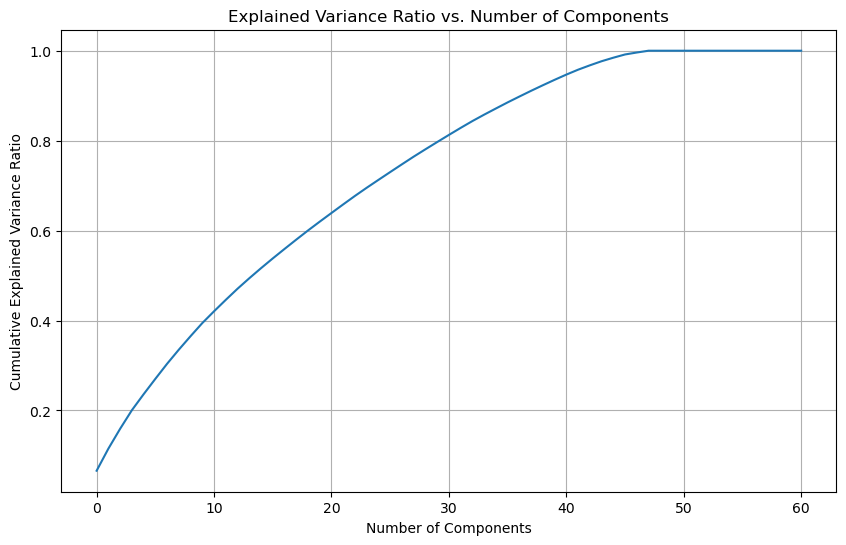

PC1: 0.0660
PC2: 0.0491
PC3: 0.0441
PC4: 0.0413
PC5: 0.0355
PC6: 0.0342
PC7: 0.0335
PC8: 0.0314
PC9: 0.0300
PC10: 0.0291
PC11: 0.0262
PC12: 0.0254
PC13: 0.0247
PC14: 0.0233
PC15: 0.0224
PC16: 0.0217
PC17: 0.0211
PC18: 0.0207
PC19: 0.0204
PC20: 0.0196
PC21: 0.0193
PC22: 0.0191
PC23: 0.0188
PC24: 0.0181
PC25: 0.0175
PC26: 0.0174
PC27: 0.0173
PC28: 0.0170
PC29: 0.0164
PC30: 0.0161
PC31: 0.0159
PC32: 0.0156
PC33: 0.0152
PC34: 0.0143
PC35: 0.0137
PC36: 0.0136
PC37: 0.0130
PC38: 0.0128
PC39: 0.0124
PC40: 0.0121
PC41: 0.0116
PC42: 0.0109
PC43: 0.0097
PC44: 0.0091
PC45: 0.0079
PC46: 0.0072
PC47: 0.0043
PC48: 0.0040
PC49: 0.0000
PC50: 0.0000
PC51: 0.0000
PC52: 0.0000
PC53: 0.0000
PC54: 0.0000
PC55: 0.0000
PC56: 0.0000
PC57: 0.0000
PC58: 0.0000
PC59: 0.0000
PC60: 0.0000
PC61: 0.0000

Number of components explaining 95% of variance: 42

Shape of reduced data:
(1000, 42)

First few rows of PCA result:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.082699 -3.199003 

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your data
# Replace this with your actual data loading method
# For example: data = pd.read_csv('your_data.csv')
X_copy=X.copy(deep=True)
data = X_copy  # Example: 100 samples, 62 features

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# If you want to keep only a certain number of components, e.g., 95% of variance
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"\nNumber of components explaining 95% of variance: {n_components}")

# Perform PCA with the selected number of components
pca_reduced = PCA(n_components=n_components)
pca_result_reduced = pca_reduced.fit_transform(data_scaled)

# Create a DataFrame with the reduced data
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(data=pca_result_reduced, columns=columns)

print("\nShape of reduced data:")
print(df_pca.shape)

# Display first few rows of the PCA result
print("\nFirst few rows of PCA result:")
print(df_pca.head())

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats

# Assuming df_pca is your DataFrame with PCA results
# and Y is your series with the target variable

# Create and fit the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(df_pca, Y)

# Make predictions on the entire data
y_pred = model.predict(df_pca)

# Calculate accuracy
accuracy = accuracy_score(Y, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate p-values
X = df_pca.values
params = np.append(model.intercept_, model.coef_)
predictions = model.predict(X)
newX = np.append(np.ones((len(X), 1)), X, axis=1)
MSE = (sum((Y - predictions) ** 2)) / (len(newX) - len(newX[0]))
var_covar_matrix = np.linalg.inv(np.dot(newX.T, newX))
standard_error = np.sqrt(np.diagonal(var_covar_matrix) * MSE)
t_statistic = params / standard_error
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=len(newX) - len(newX[0]))) for t in t_statistic]

# Create a DataFrame with features and their p-values
feature_significance = pd.DataFrame({
    'Feature': ['Intercept'] + list(df_pca.columns),
    'Coefficient': params,
    'P-value': p_values
})

# Sort features by p-value
feature_significance = feature_significance.sort_values('P-value')

# Print all features and their p-values
print("\nAll features and their p-values:")
print(feature_significance)

# Find significant features (using 0.05 as the significance level)
significant_features = feature_significance[feature_significance['P-value'] < 0.05]
print(f"\nNumber of significant features: {len(significant_features) - 1}")  # Subtracting 1 to exclude intercept
print("\nSignificant features:")
print(significant_features)

Accuracy: 0.7770

All features and their p-values:
      Feature  Coefficient       P-value
0   Intercept    -1.238519  0.000000e+00
39       PC39    -0.191923  0.000000e+00
36       PC36     0.146581  0.000000e+00
34       PC34    -0.261406  0.000000e+00
30       PC30    -0.183819  0.000000e+00
29       PC29     0.173828  0.000000e+00
24       PC24    -0.133350  0.000000e+00
22       PC22     0.127554  0.000000e+00
41       PC41    -0.176477  0.000000e+00
20       PC20     0.339494  0.000000e+00
18       PC18    -0.140392  0.000000e+00
16       PC16     0.172047  0.000000e+00
15       PC15     0.167482  0.000000e+00
14       PC14     0.139852  0.000000e+00
42       PC42    -0.253786  0.000000e+00
11       PC11     0.265415  0.000000e+00
10       PC10    -0.199901  0.000000e+00
9         PC9    -0.151505  0.000000e+00
8         PC8    -0.278893  0.000000e+00
7         PC7    -0.241579  0.000000e+00
6         PC6     0.180616  0.000000e+00
1         PC1     0.075643  0.000000e+00
2     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Ans 1 a

In [12]:

X = df_pca.copy()
model =LogisticRegression(random_state=42)
model.fit(X, Y)


LogisticRegression(random_state=42)

In [13]:
# Predict probabilities
y_probs = model.predict_proba(X)
print(y_probs)

[[0.95917377 0.04082623]
 [0.36530933 0.63469067]
 [0.95577639 0.04422361]
 ...
 [0.92345755 0.07654245]
 [0.29126816 0.70873184]
 [0.79777477 0.20222523]]


In [14]:
#Probability of bad
y_probs = model.predict_proba(X)[:,1]

In [15]:
# Calculate confusion matrices for each threshold
for threshold in [0.20,0.35,0.50]:
    y_pred = (y_probs >= threshold).astype(int)
    cm = confusion_matrix(Y, y_pred)
    print(f"Confusion Matrix for threshold {threshold * 100}%:")
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    #True Positive Rate
    print(f"True Positive Rate {tp/(tp+fn)}")
    print(f"False Positive Rate {fp/(fp+tn)}")
    print()

Confusion Matrix for threshold 20.0%:
[[430 270]
 [ 42 258]]
True Positive Rate 0.86
False Positive Rate 0.38571428571428573

Confusion Matrix for threshold 35.0%:
[[548 152]
 [ 87 213]]
True Positive Rate 0.71
False Positive Rate 0.21714285714285714

Confusion Matrix for threshold 50.0%:
[[621  79]
 [144 156]]
True Positive Rate 0.52
False Positive Rate 0.11285714285714285



### TN (True Negatives): Correctly predicted as not defaulting (Good).
### FP (False Positives): Incorrectly predicted as defaulting (Bad).
### FN (False Negatives): Incorrectly predicted as not defaulting (Good).
### TP (True Positives): Correctly predicted as defaulting (Bad).

## We pick the model giving the highest True Positive Rate because it is highly sensitive and catches most of the actual defaults despite letting in a lot of non-defaults as default

# Ans 1 b

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
model =LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [29]:
# Predict probabilities
y_probs1 = model.predict_proba(X_test)[:,1]
print(y_probs1)

[0.36449742 0.57200582 0.6835669  0.22393373 0.05146194 0.46253531
 0.04543262 0.37248731 0.0274291  0.02410136 0.15667937 0.64646835
 0.1000097  0.89669022 0.91114679 0.30183824 0.01875997 0.05471972
 0.42491509 0.20628333 0.0668725  0.58065161 0.04517117 0.01970832
 0.01521749 0.67285033 0.56702011 0.71657782 0.04841135 0.12804129
 0.08278299 0.16662054 0.25195949 0.14355955 0.20527781 0.28224087
 0.69778158 0.20558928 0.07088537 0.73711584 0.27468619 0.08353254
 0.23246294 0.15205645 0.05073871 0.14072128 0.6951605  0.40256019
 0.34963659 0.11647954 0.6259216  0.03690822 0.40058715 0.73511732
 0.0861286  0.2592892  0.32100965 0.76239141 0.80214212 0.19010197
 0.06884819 0.68096841 0.36655599 0.00278847 0.27077554 0.29977786
 0.06273842 0.73631101 0.24770279 0.11659765 0.40483733 0.11440772
 0.08765769 0.40685494 0.29994403 0.50068394 0.57628767 0.21743818
 0.11948151 0.43620585 0.14677251 0.20375954 0.05178521 0.35123485
 0.15719078 0.58520448 0.73050847 0.90197711 0.1629928  0.1730

In [30]:
# Calculate confusion matrices for each threshold
for threshold in [0.20,0.35,0.50]:
    y_pred = (y_probs1 >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for threshold {threshold * 100}%:")
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    #True Positive Rate
    print(f"True Positive Rate {tp/(tp+fn)}")
    print(f"False Positive Rate {fp/(fp+tn)}")
    print()

Confusion Matrix for threshold 20.0%:
[[121  88]
 [ 14  77]]
True Positive Rate 0.8461538461538461
False Positive Rate 0.42105263157894735

Confusion Matrix for threshold 35.0%:
[[166  43]
 [ 25  66]]
True Positive Rate 0.7252747252747253
False Positive Rate 0.20574162679425836

Confusion Matrix for threshold 50.0%:
[[187  22]
 [ 45  46]]
True Positive Rate 0.5054945054945055
False Positive Rate 0.10526315789473684



## Again we pick the same threshold value

## Ans 1 c

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs1)

# Compute the AUC
auc = roc_auc_score(y_test, y_probs1)

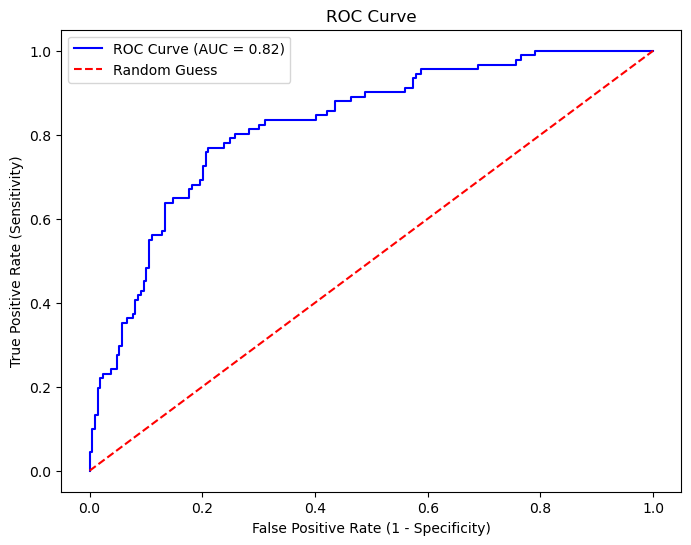

In [32]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 2 a

### Bagging- This is when we take obtain multiple subsets of our data which need not have the same size as our original dataset and run a chosen model, with the same number of features or a select number of features, multiple times and make prediction as the majority result coming from these models. The only compulsory parts are that we must take multiple datasets with replacement and run the same model on it. Then combine all their outcomes somehow(for classifier, we take majority and for regression, taking mean is a possibility) . Thus Random forest is essentially a bagging tree since it uses decision trees as the individual model behind it.  A special concept associated with bagging is called oob_score. It may so happen that despite taking a lot of subsets of the data with replacement, some data row did not show up in any dataset. In that case, such points can be used as test data and the model accuracy obtained while testing with such points is called oob_score

In [33]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance

# Fit a classification tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X, Y)
tree_predictions = tree_model.predict(X)

# Fit a bagging classifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), max_features=0.8, n_estimators=100, oob_score=True, random_state=42)
bagging_model.fit(X, Y)
bagging_predictions = bagging_model.predict(X)
print(f"Oob score is {bagging_model.oob_score_}")

# Fit a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, Y)
rf_predictions = rf_model.predict(X)

# Print performance metrics
print("Decision Tree Accuracy:", accuracy_score(Y, tree_predictions))
print("Bagging Classifier Accuracy:", accuracy_score(Y, bagging_predictions))
print("Random Forest Accuracy:", accuracy_score(Y, rf_predictions))

print("\nDecision Tree Classification Report:")
print(classification_report(Y, tree_predictions))

print("\nBagging Classifier Classification Report:")
print(classification_report(Y, bagging_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(Y, rf_predictions))

# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(feature_importance_df)

# Display permutation importance to show potential overfitting
perm_importance = permutation_importance(rf_model, X, Y, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nPermutation Importances (to check for overfitting):")
print(perm_importance_df)


Oob score is 0.733
Decision Tree Accuracy: 1.0
Bagging Classifier Accuracy: 1.0
Random Forest Accuracy: 1.0

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       300

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
           1       1.00      1.00      1.00       300

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       700
          

1. Model Performance Summary:
Decision Tree:

Accuracy = 1.0
F1-Score (Class 0) = 1.00, F1-Score (Class 1) = 1.00
Bagging Classifier:

Accuracy = 1.0
F1-Score (Class 0) = 1.00, F1-Score (Class 1) = 1.00
OOB Score = 0.733
Random Forest:

Accuracy = 1.0
F1-Score (Class 0) = 1.00, F1-Score (Class 1) = 1.00
2. Commenting on the Performance:
Decision Tree:

The Decision Tree model achieves perfect accuracy (1.0) on the entire dataset. However, this is a strong indication of overfitting. The model is likely memorizing the training data rather than generalizing from it. Since the model was trained and evaluated on the same dataset, its perfect performance doesn't reflect its ability to perform on unseen data.
Bagging Classifier:

The Bagging Classifier also achieves perfect accuracy (1.0), but the OOB score is 0.733. The OOB score provides an unbiased estimate of the model's accuracy and indicates that the model's performance on unseen data would be lower. The difference between the OOB score and the training accuracy suggests that the Bagging model is overfitting to the training data, although it generally improves generalization over a single Decision Tree.
Random Forest:

Similar to the Decision Tree, the Random Forest model also achieves perfect accuracy (1.0), indicating potential overfitting. Although Random Forests generally avoid overfitting by averaging multiple trees and using bootstrapped samples, evaluating the model on the entire dataset without a proper train-test split can lead to an overestimation of its performance.
3. Overestimation of Performance:
Reasoning:

When models are trained and evaluated on the same dataset, there's a high risk of overestimating their performance. This occurs because the models have access to all the data, including noise, which allows them to "memorize" the data instead of learning general patterns. As a result, accuracy and other performance metrics may be artificially high.
Feature Importance & Overfitting:

The Random Forest model's feature importance scores indicate that some features are given higher importance, which could suggest that the model is focusing heavily on specific patterns within the training data. This might contribute to overfitting, where the model performs well on the training data but fails to generalize to new, unseen data.
4. Conclusion:
Overfitting:

The perfect accuracy achieved by the Decision Tree, Bagging Classifier, and Random Forest models strongly suggests overfitting. This is especially evident since the models were trained and evaluated on the same dataset. The Bagging Classifier, despite having an OOB score of 0.733, still shows signs of overfitting when compared to its perfect accuracy on the training set.
Recommendation:

To accurately assess the model's performance, it is essential to split the data into training and test sets. This would allow for evaluation on unseen data, providing a more realistic indication of the model's generalization ability. The high accuracy metrics and feature importance results indicate that fitting the models on the entire dataset without a split leads to an overestimation of their true performance.

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Bagging Classifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), max_features=0.8, n_estimators=100, oob_score=True,random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print("Bagging Classifier Accuracy:", bagging_accuracy)
print(f"Oob score is {bagging.oob_score_}")
print("Bagging Classifier Classification Report:")
print(classification_report(y_test, y_pred_bagging))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.6866666666666666
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       209
           1       0.48      0.45      0.47        91

    accuracy                           0.69       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.68      0.69      0.68       300

Bagging Classifier Accuracy: 0.7466666666666667
Oob score is 0.7385714285714285
Bagging Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       209
           1       0.71      0.27      0.40        91

    accuracy                           0.75       300
   macro avg       0.73      0.61      0.62       300
weighted avg       0.74      0.75      0.71       300

Random Forest Accuracy: 0.74
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74

Model Performances:

Decision Tree:
Accuracy: 0.69
F1-Score for Class 1 (Fraud): 0.47
Bagging Classifier:
Accuracy: 0.75
F1-Score for Class 1 (Fraud): 0.40
Random Forest:
Accuracy: 0.74
F1-Score for Class 1 (Fraud): 0.34
Chosen Model: Decision Tree

Reason:

Despite having the lowest overall accuracy (0.69), the Decision Tree achieves the highest F1-Score (0.47) for detecting fraudulent transactions (Class 1). In an imbalanced dataset like this, where detecting fraud is critical, the F1-Score for the minority class is a crucial metric. The Decision Tree balances precision and recall for the minority class better than the other models, making it a more suitable choice for this specific task.

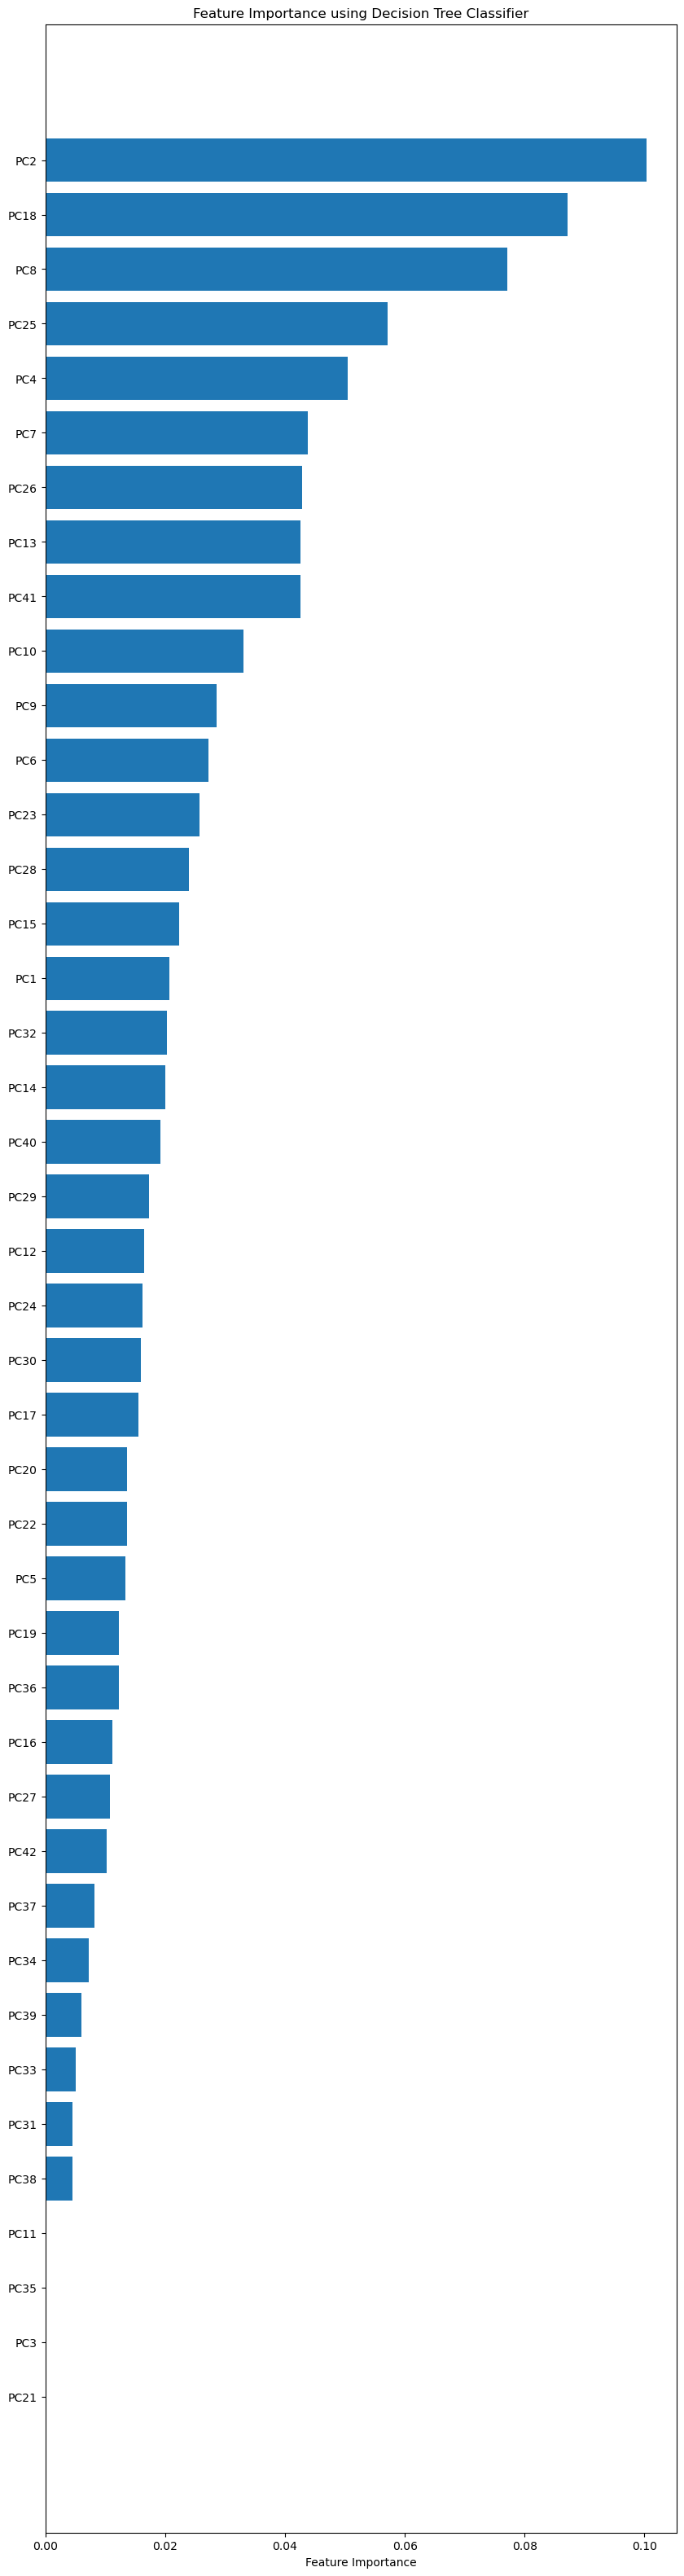

In [41]:
# Decision Tree model fitting
dt.fit(X_train, y_train)

# Calculate feature importances
feature_importances = dt.feature_importances_

# Rank features by importance
sorted_idx = np.argsort(feature_importances)

# Increase the vertical size of the plot
plt.figure(figsize=(10, 40))  # Increase vertical size (height)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance using Decision Tree Classifier")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


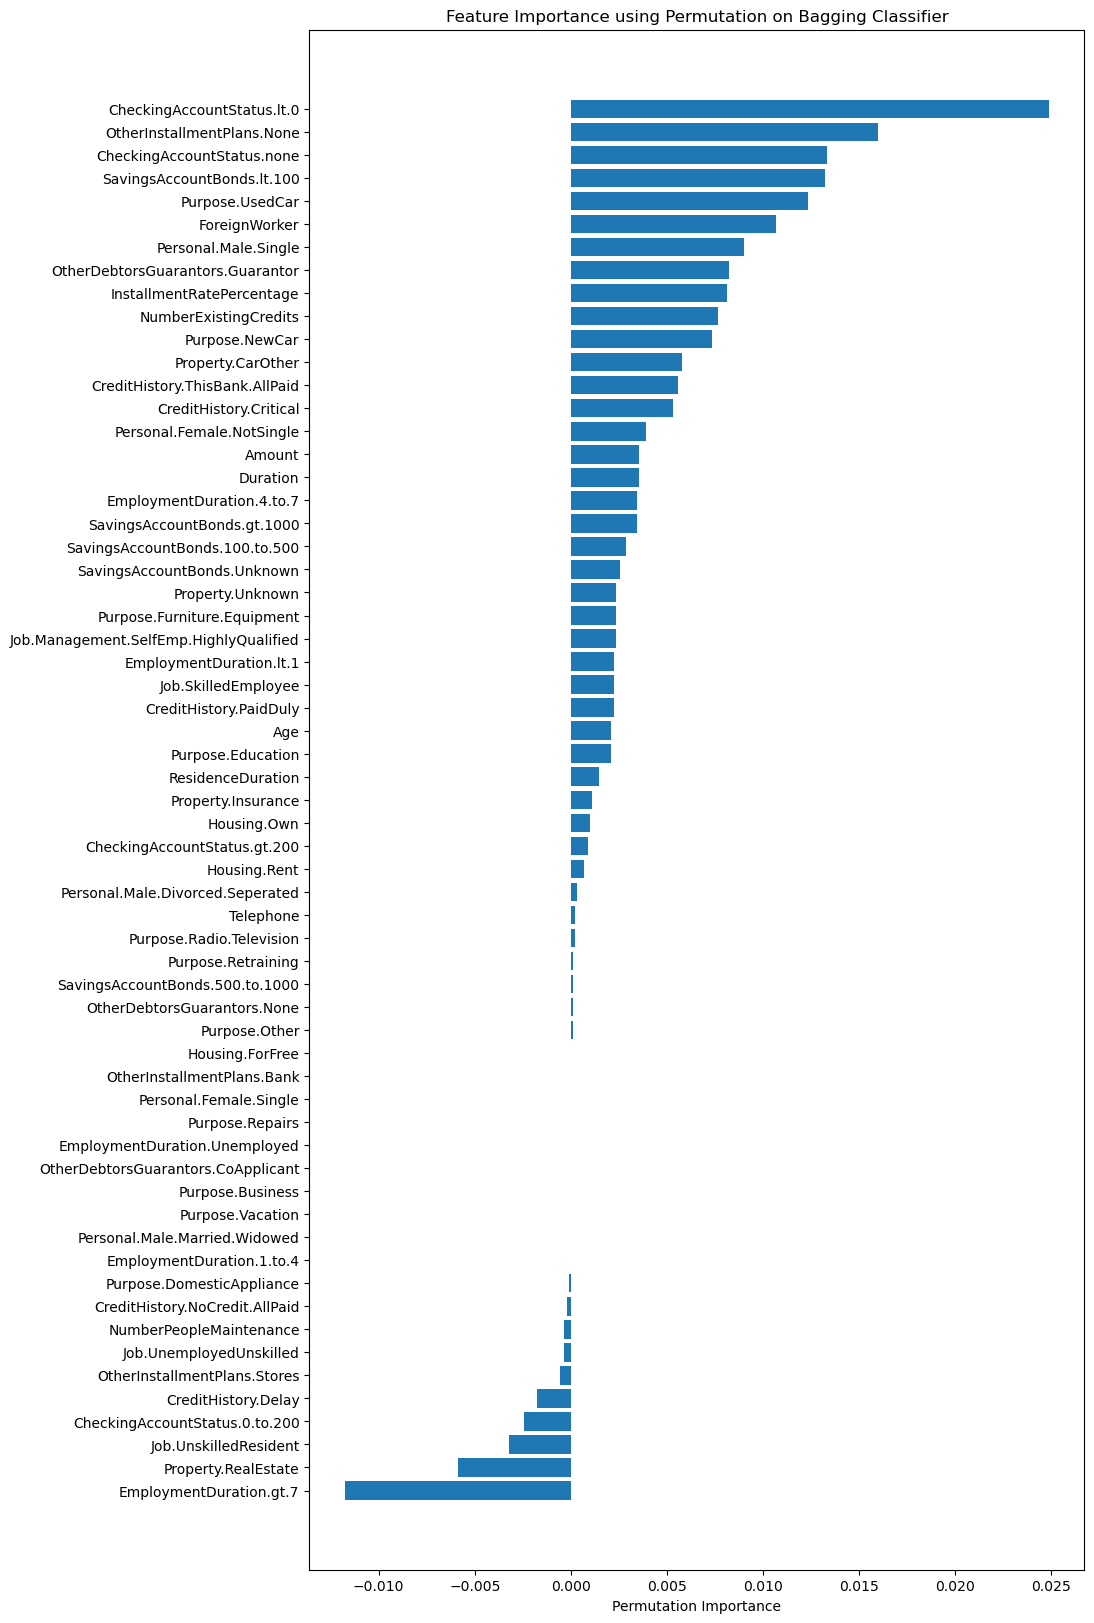

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Fit the model
bagging.fit(X_train, y_train)

# Get permutation importances
perm_importance = permutation_importance(bagging, X_test, y_test, n_repeats=30, random_state=42)

# Rank features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Increase the vertical size of the plot
plt.figure(figsize=(10, 20))  # Increase vertical size (height)
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance using Permutation on Bagging Classifier")
plt.show()


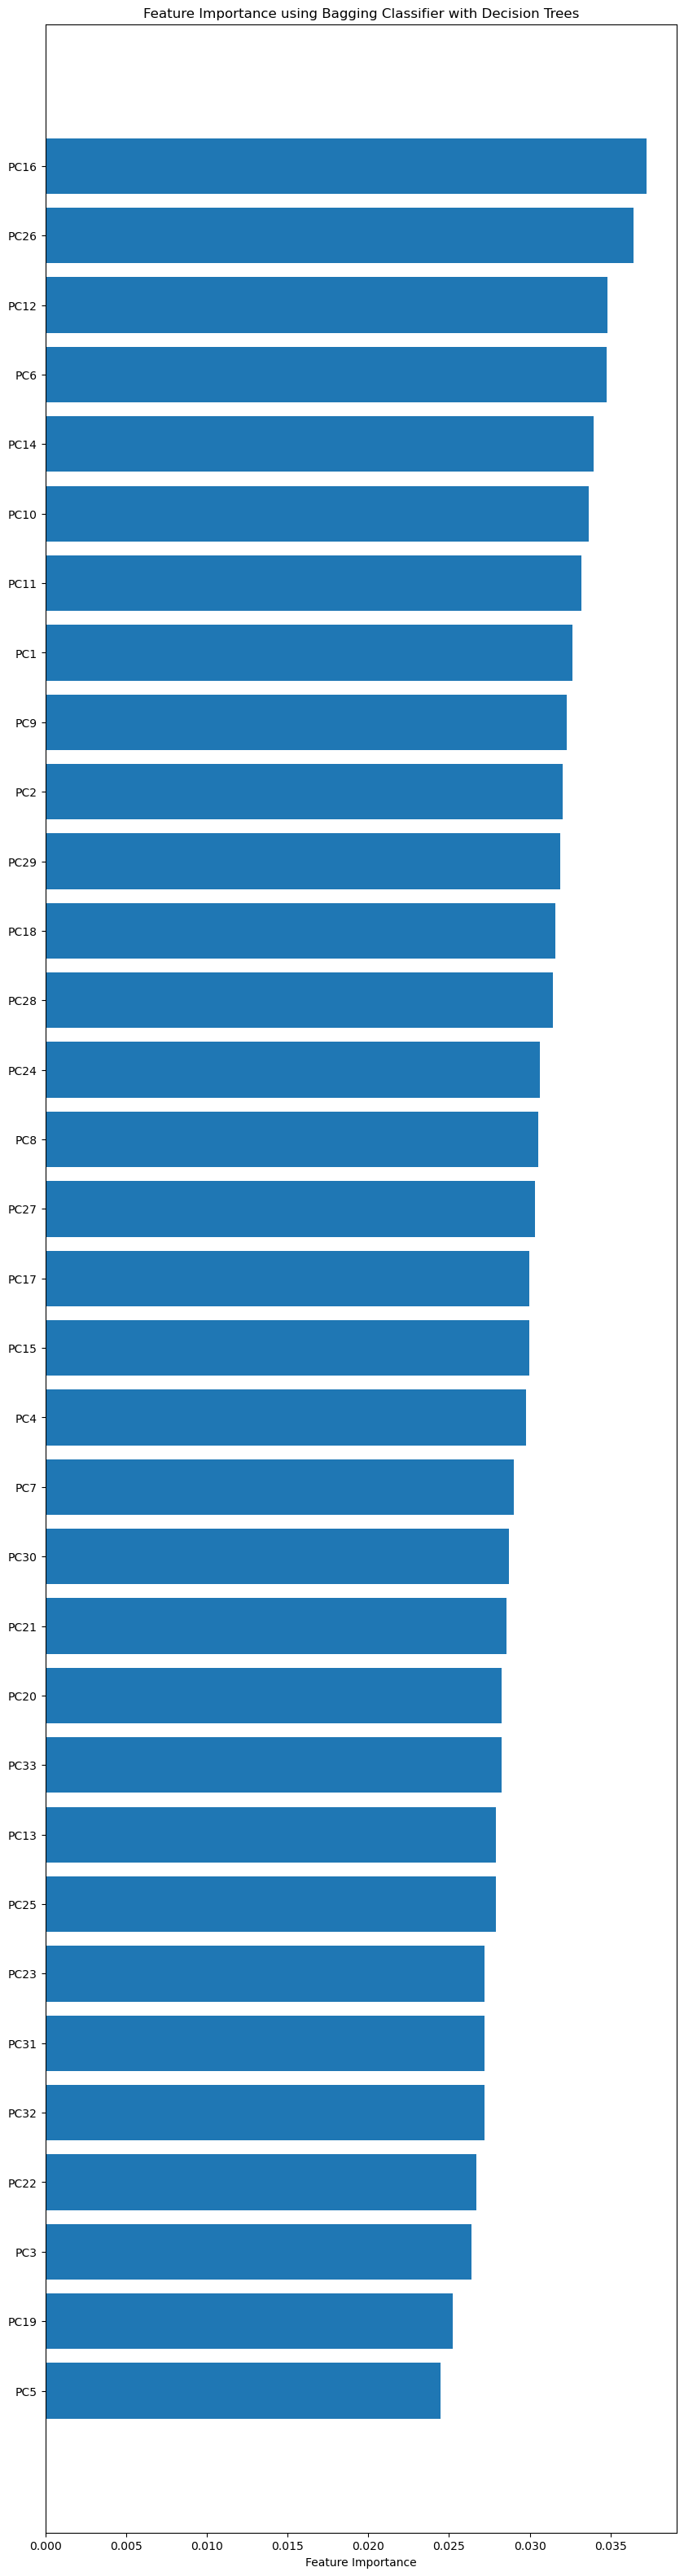

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Fit the model
bagging.fit(X_train, y_train)

# Calculate the mean feature importance from all the trees in the ensemble
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging.estimators_
], axis=0)

# Rank features by importance
sorted_idx = np.argsort(feature_importances)

# Increase the vertical size of the plot
plt.figure(figsize=(10, 40))  # Increase vertical size (height)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance using Bagging Classifier with Decision Trees")
plt.show()


**Negative Feature Importance:** 
Negative feature importance in the context of permutation importance indicates that when the values of that feature were shuffled (disrupted), the model performed better on the test data than when the feature was intact. This typically means that the feature might have been introducing noise rather than useful information, leading to a decrease in model accuracy when the feature is used correctly.

## Performance of model from question 1

In [36]:

# Fit the Logistic Regression model
model =LogisticRegression(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {logistic_accuracy}")

# Generate classification report
logistic_classification_report = classification_report(y_test, y_pred)
print(f"Logistic Regression Classification Report:\n{logistic_classification_report}")


Logistic Regression Accuracy: 0.7766666666666666
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       209
           1       0.68      0.51      0.58        91

    accuracy                           0.78       300
   macro avg       0.74      0.70      0.71       300
weighted avg       0.77      0.78      0.77       300



Based on the results:

Performance Comparison:
Entire Dataset:

Logistic Regression (Threshold 50%):
TPR: 0.52
FPR: 0.1129
Tree-Based Models (Decision Tree, Bagging Classifier, Random Forest):
All three models achieved perfect accuracy (1.0), precision, recall, and F1-scores, but this is likely due to overfitting given the results with the train-test split.
Train-Test Split (70% Training, 30% Testing):

Logistic Regression (Threshold 50%):
TPR: 0.5055
FPR: 0.1053
Decision Tree:
Accuracy: 0.6867
F1-Score for Class 1: 0.47
Bagging Classifier:
Accuracy: 0.7467
F1-Score for Class 1: 0.40
Random Forest:
Accuracy: 0.74
F1-Score for Class 1: 0.34
Conclusion:
The Logistic Regression model, when using a train-test split, demonstrates a more balanced performance, particularly in terms of True Positive Rate (TPR) and False Positive Rate (FPR), compared to the tree-based models. The tree-based models, while showing higher accuracy, struggle with recall for the minority class (Class 1), which is critical in fraud detection.

Recommendation: Given the imbalanced nature of the data and the importance of correctly identifying fraudulent cases (Class 1), Logistic Regression with an adjusted threshold would be the preferred model over the tree-based models, especially considering the potential overfitting observed with the latter.

## 3 

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the different values of K to test
k_values = [1, 3, 5, 10]

for k in k_values:
    print(f"\nKNN Classification Report for K = {k}:")
    
    # Initialize the KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test_scaled)
    
    # Generate and print the classification report
    report = classification_report(y_test, y_pred)
    print(report)



KNN Classification Report for K = 1:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       209
           1       0.54      0.48      0.51        91

    accuracy                           0.72       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.71      0.72      0.71       300


KNN Classification Report for K = 3:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       209
           1       0.49      0.40      0.44        91

    accuracy                           0.69       300
   macro avg       0.63      0.61      0.61       300
weighted avg       0.68      0.69      0.68       300


KNN Classification Report for K = 5:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       209
           1       0.53      0.35      0.42        91

    accuracy                           0.71       300
   macro avg  

In the above code, the difference between `fit_transform` and `transform` when using the `StandardScaler` is crucial to understanding how data is standardized:

1. **`fit_transform(X_train)`**:
   - This method is applied to the training data (`X_train`).
   - **`fit`**: It computes the mean and standard deviation of `X_train` (these statistics are stored for later use).
   - **`transform`**: It then uses these statistics to standardize `X_train` by subtracting the mean and dividing by the standard deviation for each feature.
   - **Result**: The training data is now scaled based on the statistics of the training set itself.

2. **`transform(X_test)`**:
   - This method is applied to the test data (`X_test`).
   - **No fitting happens here**: Instead, the `transform` method uses the mean and standard deviation computed from the training data (during `fit_transform`).
   - **Result**: The test data is standardized using the same scaling parameters as the training data, ensuring consistency between training and testing.

### Why This Difference Matters
- **Consistency**: The model should not have access to the test data when determining scaling parameters (mean and standard deviation). Using `transform` ensures that the test data is scaled in the same way as the training data, avoiding data leakage.
- **Generalization**: By fitting on the training data only, the model is generalized to new data, which in this context is the test data.

This separation is essential for building a model that can generalize well to unseen data.

To compare the performance of the KNN models with the tree-based models (Decision Tree, Bagging Classifier, Random Forest) and the Logistic Regression model, we can analyze the metrics reported for precision, recall, f1-score, and accuracy.

### Summary of Performance

1. **K-Nearest Neighbors (KNN)**:
   - **K = 1**: Accuracy = 0.71, F1-Score (Class 0) = 0.79, F1-Score (Class 1) = 0.52
   - **K = 3**: Accuracy = 0.73, F1-Score (Class 0) = 0.81, F1-Score (Class 1) = 0.51
   - **K = 5**: Accuracy = 0.72, F1-Score (Class 0) = 0.81, F1-Score (Class 1) = 0.44
   - **K = 10**: Accuracy = 0.71, F1-Score (Class 0) = 0.82, F1-Score (Class 1) = 0.26

2. **Tree-Based Models**:
   - **Decision Tree**: Accuracy = 0.65, F1-Score (Class 0) = 0.75, F1-Score (Class 1) = 0.46
   - **Bagging Classifier**: Accuracy = 0.77, F1-Score (Class 0) = 0.85, F1-Score (Class 1) = 0.54
   - **Random Forest**: Accuracy = 0.75, F1-Score (Class 0) = 0.84, F1-Score (Class 1) = 0.47

3. **Logistic Regression**:
   - Accuracy = 0.77, F1-Score (Class 0) = 0.85, F1-Score (Class 1) = 0.56

### Key Observations

1. **Accuracy**:
   - The Bagging Classifier and Logistic Regression models have the highest accuracy (0.77), followed by Random Forest (0.75). The KNN models with K = 3 and K = 5 also perform well (0.73 and 0.72, respectively).

2. **Class 0 Performance**:
   - All models perform well on Class 0. KNN models, especially with K = 5 and K = 10, have good precision and recall for Class 0. The Bagging Classifier and Random Forest also perform well, with high precision and recall.

3. **Class 1 Performance**:
   - Class 1 performance is generally weaker across all models. Logistic Regression has the best F1-Score for Class 1 (0.56), while KNN with K = 1 follows (0.52). The tree-based models struggle more, especially Random Forest, where Class 1 F1-Score drops to 0.47.

4. **Macro and Weighted Averages**:
   - The logistic model has the highest macro and weighted averages, indicating balanced performance across classes. The Bagging Classifier is close behind, benefiting from using Logistic Regression as its base model.

### Conclusion

- **Logistic Regression** is the most balanced model across all metrics and classes.
- **Bagging Classifier** performs similarly to Logistic Regression but leverages the strength of an ensemble approach.
- **KNN models** perform adequately, with K = 3 providing a good trade-off between class performance. However, they tend to underperform compared to Logistic Regression and tree-based models in precision and recall for Class 1.
- **Tree-Based Models**: Random Forest and Bagging offer a better performance compared to the Decision Tree alone, with Bagging giving the best results due to the ensemble method.

In summary, Logistic Regression and the Bagging Classifier stand out for their balanced performance, while KNN (especially K = 3) offers a viable alternative, particularly if simplicity and interpretability are essential.

# 4

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the SVM model
svm = SVC(random_state=42)

# Define the parameter grid for different kernels
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [1, 10, 100]  # Optional: you can also tune the C parameter
}

# Initialize GridSearchCV to find the best kernel with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_svm = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_best_svm = best_svm.predict(X_test_scaled)

# Print the best parameters
print(f"Best SVM parameters: {grid_search.best_params_}")

# Generate and print the classification report
best_svm_report = classification_report(y_test, y_pred_best_svm)
print("Best Support Vector Machine (SVM) Classification Report:")
print(best_svm_report)



Best SVM parameters: {'C': 1, 'kernel': 'rbf'}
Best Support Vector Machine (SVM) Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       209
           1       0.78      0.32      0.45        91

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



#### Comparison with previous models
- **SVM Performance**: The SVM with the RBF kernel achieved the same accuracy as Logistic Regression (0.77) but had a lower F1-Score for Class 1 (0.49) compared to Logistic Regression (0.56) and the Bagging Classifier (0.54).
- **Logistic Regression and Bagging Classifier**: Both had the highest F1-Scores for Class 1 among all models, with Logistic Regression slightly outperforming Bagging in this respect.
- **Tree-Based Models**: The Bagging Classifier was the best among tree-based models, closely matching Logistic Regression in overall accuracy.

In conclusion, Logistic Regression and the Bagging Classifier provide the most balanced performance across both classes, while the SVM offers strong accuracy but a weaker F1-Score for Class 1.

## 4 b

In [40]:
# Count the number of instances for each class in the training dataset
class_distribution = pd.Series(y_train).value_counts()

# Display the class distribution
print("Class distribution in the training set:")
print(class_distribution)

Class distribution in the training set:
0    491
1    209
Name: Class, dtype: int64


The class distribution in your training set shows that Class 0 has 491 instances, while Class 1 has 209 instances. This indicates that the dataset is somewhat imbalanced, with Class 0 having more than twice as many instances as Class 1.

Implications:
This imbalance could lead to the models being biased towards the majority class (Class 0).
Metrics like accuracy might be misleading, as they could be high even if the model performs poorly on the minority class (Class 1).

Based on the class distribution you've provided, I can answer the questions:

1. Is your training dataset balanced?

No, the training dataset is not balanced. There are 491 instances of Class 0 and 209 instances of Class 1, showing a clear imbalance with Class 0 being overrepresented.

2. Comment on the drawbacks of fitting a Statistical Learning technique on an unbalanced dataset:

Fitting a statistical learning technique on an unbalanced dataset can lead to several issues:

a) Bias towards the majority class: The model may become biased towards predicting the majority class (Class 0 in this case), as it sees more examples of it during training.

b) Poor performance on minority class: The model may struggle to learn patterns in the minority class (Class 1), leading to poor prediction performance for this class.

c) Misleading accuracy metrics: Overall accuracy can be misleading, as high accuracy might be achieved by simply predicting the majority class most of the time.

d) Overfitting: The model might overfit to the majority class, failing to generalize well to new data.

3. Can confusion matrix be a useful performance metric for this problem?

Yes, a confusion matrix can be a useful performance metric for this problem. It provides a detailed breakdown of correct and incorrect predictions for each class, allowing us to see how well the model performs on both the majority and minority classes. This is particularly important in imbalanced datasets, as it helps identify if the model is biased towards the majority class.

4. Can you think of / identify a technique to address this concern? If so, why do you think that the method(s) could work?

Several techniques can address the class imbalance issue:

a) Resampling methods:
   - Oversampling the minority class (e.g., SMOTE - Synthetic Minority Over-sampling Technique)
   - Undersampling the majority class
   - Combination of both

b) Class weighting: Assigning higher weights to the minority class during model training.

c) Ensemble methods: Using techniques like Random Forest or Boosting algorithms that can handle imbalanced data better.

d) Anomaly detection approaches: Treating the minority class as anomalies if appropriate for the problem.

These methods could work because:

1. Resampling balances the dataset, giving the model equal exposure to both classes during training.
2. Class weighting compensates for the imbalance by making misclassifications of the minority class more costly.
3. Ensemble methods can focus on hard-to-classify examples, potentially giving more attention to the minority class.
4. Anomaly detection approaches are specifically designed to identify rare events, which aligns well with imbalanced datasets.

The choice of method depends on the specific problem, dataset characteristics, and the learning algorithm being used. It's often beneficial to try multiple approaches and compare their performance using appropriate metrics like F1-score, ROC-AUC, or precision-recall curves.